# Psych 45: Semantic memory demo stats


In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
sns.set(style='ticks', context='poster', font_scale=1)

In [3]:
data = pd.read_csv('http://web.stanford.edu/class/psych45/demos/Semantic_demo.csv', index_col=[0],
                   header=[0, 1], skipinitialspace=True)
data.head()

fruit                   sport                     bird       \
Timestamp     apple fig strawberry football hockey wrestling ostrich wren   
4/26/16 11:47     1   4          2        1      1         5       5    2   
4/28/16 11:04     2   6          2        1      2         2       2    5   
4/28/16 11:05     1   3          1        1      1         2       2    1   
4/28/16 11:06     1   1          1        1      1         1       3    1   
4/28/16 11:24     1   2          1        2      2         2       1    2   

                    vehicle                   crime                 vegetable  \
Timestamp     robin    boat tricycle car embezzling murder vagrancy   parsley   
4/26/16 11:47     1       3        5   1          4      2        6         6   
4/28/16 11:04     3       2        2   2          2      1        2         3   
4/28/16 11:05     1       2        3   1          2      1        5         1   
4/28/16 11:06     1       1        3   1          1      1        7         7   
4/28/16 11:24     1       1        2   1          2      1        2         4   

                            
Timestamp     carrot onion  
4/26/16 11:47      2     3  
4/28/16 11:04      1     1  
4/28/16 11:05      1     2  
4/28/16 11:06      1     1  
4/28/16 11:24      1     3

In [4]:
print 'We currently have data from ' + str(data.count()[0]) + ' students.'

We currently have data from 125 students.


In [5]:
df = data.unstack().reset_index(name='rating')
df.rename(columns={'level_0': 'category', 'Timestamp': 'item', 'level_2': 'timestamp'}, inplace=True)
df.head()

,category,item,timestamp,rating
0,fruit,apple,4/26/16 11:47,1
1,fruit,apple,4/28/16 11:04,2
2,fruit,apple,4/28/16 11:05,1
3,fruit,apple,4/28/16 11:06,1
4,fruit,apple,4/28/16 11:24,1


In [6]:
category_list = df.category.unique()

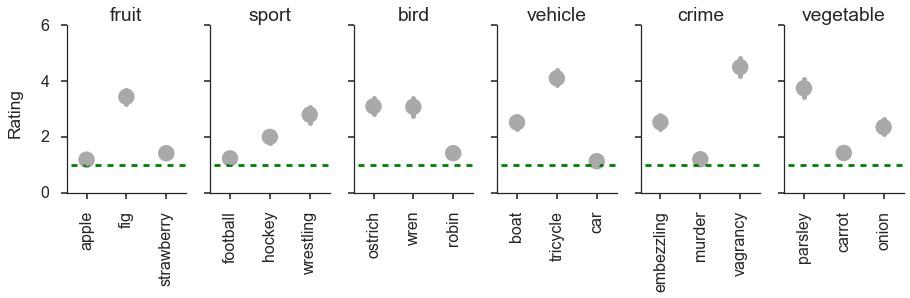

In [7]:
f, axes = plt.subplots(ncols=len(category_list), figsize=(15, 3), sharey=True)
plt.locator_params(nbins=5)
first = True

for ax, category in zip(axes, category_list):
    ax.hlines(y=1, xmin=-1, xmax=4, linestyles='dashed', colors='green')
    g = sns.pointplot(x='item', y='rating', ax=ax, jitter=True, alpha=.4, 
                      ci=95, palette=['darkgray'],
                      data=df.loc[df.category == category])
    g.set_title(category)
    g.set_ylabel('')
    g.set_xlabel('')
    g.set_xticklabels(df.loc[df.category == category].item.unique(), rotation=90)
    
f.text(0.07, 0.5, 'Rating', va='center', rotation='vertical', fontsize='xx-large')
sns.despine()

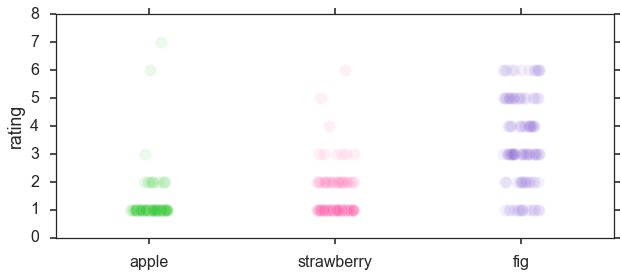

In [34]:
f, ax = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
g = sns.stripplot(x='item', y='rating', jitter=True, alpha=.1, size=12, linewidth=1,
                  data=df.loc[df.category == 'fruit'], 
                  order=['apple', 'strawberry', 'fig'],
                  palette=['limegreen', 'hotpink', 'mediumpurple'], ax=ax)
g.set_xlabel('')

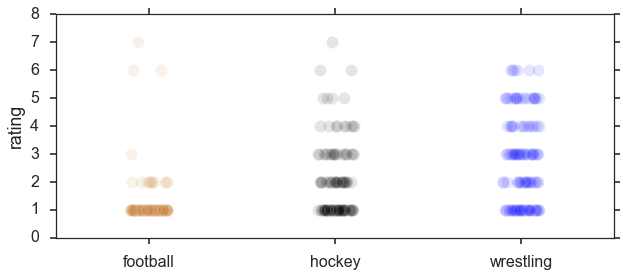

In [35]:
f, ax = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
g = sns.stripplot(x='item', y='rating', jitter=True, alpha=.1, size=12, linewidth=1,
                  data=df.loc[df.category == 'sport'], 
                  order=['football', 'hockey', 'wrestling'],
                  palette=['peru', 'black', 'blue'], ax=ax)
g.set_xlabel('')

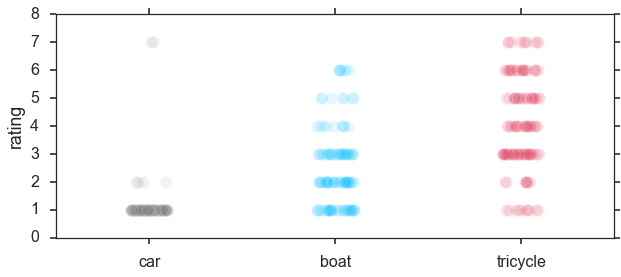

In [40]:
f, ax = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
g = sns.stripplot(x='item', y='rating', jitter=True, alpha=.1, size=12, linewidth=1,
                  data=df.loc[df.category == 'vehicle'], 
                  order=['car', 'boat', 'tricycle'],
                  palette=['gray', 'deepskyblue', 'crimson'], ax=ax)
g.set_xlabel('')